# Logistic Regression in scikit-learn - Lab

## Introduction 

In this lab, you are going to fit a logistic regression model to a dataset concerning heart disease. Whether or not a patient has heart disease is indicated in the column labeled `'target'`. 1 is for positive for heart disease while 0 indicates no heart disease.

## Objectives

In this lab you will: 

- Fit a logistic regression model using scikit-learn 


## Let's get started!

Run the following cells that import the necessary functions and import the dataset: 

In [16]:
# Import necessary functions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [17]:
# Import data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Define appropriate `X` and `y` 

Recall the dataset contains information about whether or not a patient has heart disease and is indicated in the column labeled `'target'`. With that, define appropriate `X` (predictors) and `y` (target) in order to model whether or not a patient has heart disease.

In [18]:
# Split the data into target and predictors
y = df['target']
X = df.drop('target', axis=1)

## Train- test split 

- Split the data into training and test sets 
- Assign 25% to the test set 
- Set the `random_state` to 0 

N.B. To avoid possible data leakage, it is best to split the data first, and then normalize.

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Normalize the data 

Normalize the data (`X`) prior to fitting the model. 

In [20]:
# Your code here
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


## Fit a model

- Instantiate `LogisticRegression`
  - Make sure you don't include the intercept  
  - set `C` to a very large number such as `1e12` 
  - Use the `'liblinear'` solver 
- Fit the model to the training data 

In [21]:
# Instantiate the model
logreg = LogisticRegression(
    solver='liblinear',
    C=1e12,
    fit_intercept=False
)

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

## Predict
Generate predictions for the training and test sets. 

In [22]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

## How many times was the classifier correct on the training set?

In [23]:
# We could subtract the two columns. If values or equal, difference will be zero. 
# Then count number of zeros.
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))


target
0    194
1     33
Name: count, dtype: int64
------------------------------------
target
0    0.854626
1    0.145374
Name: proportion, dtype: float64


## How many times was the classifier correct on the test set?

In [24]:

# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

target
0    63
1    13
Name: count, dtype: int64
------------------------------------
target
0    0.828947
1    0.171053
Name: proportion, dtype: float64


## Analysis
Describe how well you think this initial model is performing based on the training and test performance. Within your description, make note of how you evaluated performance as compared to your previous work with regression.

In [25]:
"""In this instance, our model predicts the majority class well, with roughly 
85% predicted for the training set and 83% for the test set. The predicted class 
proportions are similar between train and test, suggesting the model generalizes 
reasonably well. However, without a confusion matrix, we cannot confirm the 
balance of False Positives and False Negatives."""

'In this instance, our model predicts the majority class well, with roughly \n85% predicted for the training set and 83% for the test set. The predicted class \nproportions are similar between train and test, suggesting the model generalizes \nreasonably well. However, without a confusion matrix, we cannot confirm the \nbalance of False Positives and False Negatives.'

# Get the confusion matrix for the test set

In [26]:
from sklearn.metrics import confusion_matrix

conf_mat=confusion_matrix(y_test,y_hat_test)
conf_mat

array([[24,  9],
       [ 4, 39]], dtype=int64)

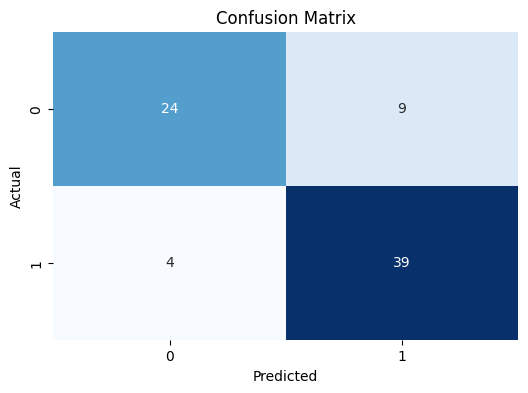

In [35]:
#plot confussion matrix

import matplotlib.pyplot as plt
import seaborn as sns

conf_mat=confusion_matrix(y_test,y_hat_test)

plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

True Negatives (TN): 24 → actual 0, predicted 0

False Positives (FP): 9 → actual 0, predicted 1

False Negatives (FN): 4 → actual 1, predicted 0

True Positives (TP): 39 → actual 1, predicted 1

The model is doing very well on class 1, with high recall (~91%), meaning it catches most of the positive cases.

There are slightly more False Positives (9) than False Negatives (4), so it errs a bit more by predicting class 1 incorrectly.

Accuracy is high (~83%), but given the balance of classes, it’s also important to consider precision/recall, which show that the model is reasonably balanced and not just predicting the majority class.

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



`Class 0`:

Precision = 0.86 → Of all the times the model predicted class 0, 86% were correct.

Recall = 0.73 → Of all the actual class 0 instances, the model correctly identified 73%.

F1-score = 0.79 → The harmonic mean of precision and recall, giving a balanced view.

`Class 1`:

Precision = 0.81 → Of all the times the model predicted class 1, 81% were correct.

Recall = 0.91 → Of all the actual class 1 instances, the model correctly identified 91%.

F1-score = 0.86 → A strong balance between precision and recall for class 1.
`
Interpretation:`

The model is better at identifying class 1 (high recall 0.91) than class 0.

For class 0, recall is lower (0.73), so some class 0 instances are being misclassified as class 1 (False Positives).

`Accuracy` = 0.83 → Overall, 83% of predictions are correct.

`Macro avg` → Simple average across classes:

 `Precision`: 0.83

 `Recall`: 0.82

 `F1-score`: 0.82
This treats both classes equally, regardless of support.

`Weighted avg` → Averages metrics accounting for class support (number of samples per class).

 Weighted precision, recall, F1 = ~0.83, reflecting that the model’s performance aligns with the class distribution.

## `Overall Interpretation`

`The model achieves an overall accuracy of 83%, indicating that most predictions are correct. Class-wise performance shows that it predicts class 1 very well, with high recall (91%) and F1-score (0.86), meaning it captures most of the positive instances. Class 0 has slightly lower recall (73%), so some class 0 instances are misclassified as class 1, but precision remains high (86%). Overall, the balanced F1-scores and weighted averages suggest the model performs reasonably well across both classes, though there is minor misclassification of the minority class.`

## Summary

In this lab, you practiced a standard data science pipeline: importing data, split it into training and test sets, and fit a logistic regression model. In the upcoming labs and lessons, you'll continue to investigate how to analyze and tune these models for various scenarios.